In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
tweet = pd.read_csv('./tweet/Tweet.csv')

In [3]:
tweet.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1


In [4]:
# convert datetime
tweet['day_date'] = pd.to_datetime(tweet['post_date'], unit = 's')
# only cares about day
tweet['day_date'] = pd.to_datetime(tweet['day_date'].apply(lambda x: x.date()))
tweet = tweet.sort_values(by = "day_date")
tweet = tweet.drop('post_date', axis = 1)
print(tweet['day_date'].iloc[0])
print(tweet['day_date'].iloc[-1])

2015-01-01 00:00:00
2019-12-31 00:00:00


In [5]:
# load dataset
company = pd.read_csv('./tweet/Company_Tweet.csv')

In [6]:
company.head()

,tweet_id,ticker_symbol
0,550803612197457920,AAPL
1,550803610825928706,AAPL
2,550803225113157632,AAPL
3,550802957370159104,AAPL
4,550802855129382912,AAPL


In [7]:
# load stock dateset
stock = pd.read_csv('./stock/CompanyValues.csv')

In [8]:
stock.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
0,AAPL,2020-05-29,317.94,38399530,319.25,321.15,316.47
1,AAPL,2020-05-28,318.25,33449100,316.77,323.44,315.63
2,AAPL,2020-05-27,318.11,28236270,316.14,318.71,313.09
3,AAPL,2020-05-26,316.73,31380450,323.50,324.24,316.50
4,AAPL,2020-05-22,318.89,20450750,315.77,319.23,315.35


In [9]:
stock['gain'] = stock.close_value - stock.open_value
stock.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value,gain
0,AAPL,2020-05-29,317.94,38399530,319.25,321.15,316.47,-1.31
1,AAPL,2020-05-28,318.25,33449100,316.77,323.44,315.63,1.48
2,AAPL,2020-05-27,318.11,28236270,316.14,318.71,313.09,1.97
3,AAPL,2020-05-26,316.73,31380450,323.50,324.24,316.50,-6.77
4,AAPL,2020-05-22,318.89,20450750,315.77,319.23,315.35,3.12


In [10]:
# filter stock by date of tweet
stock['day_date'] = pd.to_datetime(stock['day_date'])
stock_cy = stock[(stock["day_date"] >= '2015-01-01') & (stock["day_date"] <= '2019-12-31')]
# sort stock by day_date
stock_cy = stock_cy.sort_values(by = "day_date")
stock_cy = stock_cy[stock_cy["ticker_symbol"] == 'AAPL']
stock_cy.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value,gain
2517,AAPL,2015-01-01,110.38,41304780,112.82,113.13,110.21,-2.44
1360,AAPL,2015-01-02,109.33,53143770,111.39,111.44,107.35,-2.06
2518,AAPL,2015-01-03,109.33,53143770,111.39,111.44,107.35,-2.06
2519,AAPL,2015-01-04,109.33,53143770,111.39,111.44,107.35,-2.06
1359,AAPL,2015-01-05,106.25,64210880,108.29,108.65,105.41,-2.04


In [11]:
# merge the tweet dataset and company dataset via tweet_id
tweet_company = pd.merge(tweet, company, on = "tweet_id", how = "inner")
tweet_company.head()

,tweet_id,writer,body,comment_num,retweet_num,like_num,day_date,ticker_symbol
0,550441509175443456,VisualStockRSRC,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,2015-01-01,AAPL
1,550709117439197185,HotpageNews,#Google Fiber’s latest FCC filing is #Comcast ...,0,0,0,2015-01-01,GOOG
2,550710996353167360,BookingBCN,Jeff Bezos lost $7.4 billion in Amazon's worst...,0,0,1,2015-01-01,AMZN
3,550711009082482690,KymLang,$TSLA Weekly Updated https://tradingview.com/x...,0,0,1,2015-01-01,TSLA
4,550712141863342080,nozbycek,$MSFT What Microsoft's 'fresh start' browser s...,0,0,1,2015-01-01,MSFT


In [12]:
# filter dataset via apple
tweet_cy = tweet_company[tweet_company['ticker_symbol'] == 'AAPL']
tweet_cy.head()

,tweet_id,writer,body,comment_num,retweet_num,like_num,day_date,ticker_symbol
0,550441509175443456,VisualStockRSRC,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,2015-01-01,AAPL
6,550713014346059776,SentiQuant,#SENTISHIFTUP $K $AAPL $GS $FB $T $TWTR $BABA ...,0,0,0,2015-01-01,AAPL
16,550716105573269506,OphirGottlieb,$AAPL Risk into Earnings Rising Early (pic)dat...,0,1,3,2015-01-01,AAPL
17,550713015797284864,SentiQuant,#TOPTICKERTWEETS $AAPL $BABA $EBAY $IMRS $AMZN...,0,0,1,2015-01-01,AAPL
20,550709021653876736,helpYOUgetGAINS,Apple’s Guided Tour to Using the First Macinto...,0,0,0,2015-01-01,AAPL


In [13]:
pd.options.display.max_colwidth = None
tweet_cy['body'][:10]

0            lx21 made $10,008  on $AAPL -Check it out! http://profit.ly/1MnD8s?aff=202 Learn #howtotrade http://bit.ly/1c1NljX $EXE $WATT $IMRS $CACH $GMO
6                                                         #SENTISHIFTUP $K $AAPL $GS $FB $T $TWTR $BABA $LNKD $AMZN $QUAD #sentiquant 20150101 13:00:04:301
16                                    $AAPL Risk into Earnings Rising Early (pic)data via -> http://bit.ly/lvo_volscan-Option Trading is Volatility Trading
17                                                     #TOPTICKERTWEETS $AAPL $BABA $EBAY $IMRS $AMZN $T $SPY $IGN $K $FB #sentiquant 20150101 13:00:07:815
20                                                                             Apple’s Guided Tour to Using the First Macintosh (1984) | Open Culture $AAPL
22                                                  .@Apple #iPad sales decline partly due to #iPhone 6 and iPhone 6 Plus $AAPL http://tweaktown.to/1zVfyc3
23                                                              

In [14]:
import re

In [15]:
# preprocessing the dataset
def preprocessing(tweet):
    # remove RT beginning words
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    
    # remove usernames
    tweet = re.sub(r'@[^ ]+', '', tweet)
    
    # remove URLs
    tweet = re.sub(r'https?://\S+|www\.\S+', '', tweet)
    
    #remove punctations
    tweet = re.sub(r'[^\w\s]', '', tweet)
    
    # remove single numbers
    tweet = re.sub(r'[0-9]', '', tweet)

    # lower the words of tweets
    tweet = tweet.lower()
    
    return tweet

In [16]:
# tokenization, remove stopwords and lemmatizing
import nltk
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

stop_words = stopwords.words('english')

# tag the tokens
def get_word_tag(tree_tag):
    if tree_tag.startswith('J'):
        return wordnet.ADJ
    elif tree_tag.startswith('V'):
        return wordnet.VERB
    elif tree_tag.startswith('N'):
        return wordnet.NOUN
    elif tree_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

lm = WordNetLemmatizer()
def remove_stopwords(content):
    words = word_tokenize(content)
    tags = pos_tag(words)
    word_tag = map(lambda x: (x[0], get_word_tag(x[1])), tags)
    lemm = []
    for token, tag in word_tag:
        if tag is None:
            lemm.append(lm.lemmatize(token))
        else:
            lemm.append(lm.lemmatize(token, tag))
    lemm = [w for w in lemm if not w in stop_words]
    
    return ' '.join(lemm)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tangjiaye/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/tangjiaye/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tangjiaye/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/tangjiaye/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/tangjiaye/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


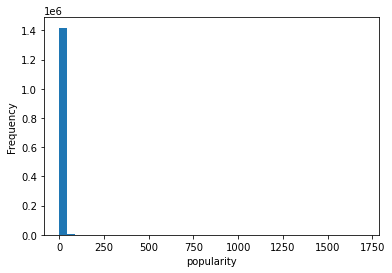

In [17]:
tweet_test = tweet_cy.copy()
tweet_test['popularity'] = tweet_test['comment_num'] + tweet_test['retweet_num'] + tweet_test['like_num']
tweet_test.popularity.plot(kind = 'hist', bins = 40)
plt.xlabel('popularity')
plt.show()

In [18]:
# set the threshold as 50
tweet_test = tweet_test[tweet_test['popularity'] >= 50]
# drop unused columns
tweet_test = tweet_test.drop(columns = ['comment_num', 'retweet_num', 'like_num'], axis = 1)
tweet_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5384 entries, 187 to 4336426
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   tweet_id       5384 non-null   int64         
 1   writer         5332 non-null   object        
 2   body           5384 non-null   object        
 3   day_date       5384 non-null   datetime64[ns]
 4   ticker_symbol  5384 non-null   object        
 5   popularity     5384 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 294.4+ KB


In [19]:
# Get top 10 hashtags
hashtags = tweet_test['body'].apply(lambda x: re.findall('#\w+', x.lower())).sum(axis = 0)
hashtags = pd.DataFrame(hashtags, columns = ['hashtags'])
hashtags = hashtags.value_counts().reset_index(name = 'counts')
hashtags[:10]

,hashtags,counts
0,#apple,249
1,#bitcoin,136
2,#trading,107
3,#stocks,94
4,#crypto,92
5,#blockchain,81
6,#ethereum,80
7,#iphone,66
8,#btc,66
9,#ico,62


In [20]:
# check the body of tweets
tweet_test['body'][:10]

187                                                                                   This is Wall Street's top pick in 2015. Hint: it's NOT $AAPL or $GOOGL » http://cnb.cx/1xsBWIT
214                                                          See how tech companies like Apple, Twitter and Facebook rank in terms of diversity: http://on.wsj.com/1CTSFXQ $AAPL $FB
558                                                                       Analyst Report on Top Stock Market Options for 2015 Read Here $AAPL $AMZN $BABA $EBAY http://goo.gl/puLqYi
563                                                                   Top Stock Analyst Releases Report on Top Stocks for 2015 $ECIG $T $AAPL $BABA $EBAY $CTIX http://goo.gl/smKMJN
1507                                                                  Top Stock Analyst Releases Report on Top Stocks for 2015 $ECIG $T $AAPL $BABA $EBAY $CTIX http://goo.gl/smKMJN
1510                                                                      Analyst Report on Top

In [21]:
tweet_test['body'] = tweet_test['body'].apply(lambda x: preprocessing(x))
tweet_test['body'][:10]

187                                 this is wall streets top pick in  hint its not aapl or googl  
214     see how tech companies like apple twitter and facebook rank in terms of diversity  aapl fb
558                 analyst report on top stock market options for  read here aapl amzn baba ebay 
563               top stock analyst releases report on top stocks for  ecig t aapl baba ebay ctix 
1507              top stock analyst releases report on top stocks for  ecig t aapl baba ebay ctix 
1510                analyst report on top stock market options for  read here aapl amzn baba ebay 
2159                                                 trading trends for  from   abx uso bhi aapl  
3376                                 this is wall streets top pick in  and its not aapl or googl  
3988                    ibd  stocks poised for strong  earnings gains  amba gpro bidu fb aapl avgo
4133    see how tech companies like apple twitter and facebook rank in terms of diversity  aapl fb
Name: body

In [22]:
tweet_test['body'] = tweet_test['body'].apply(lambda x: remove_stopwords(x))
tweet_test['body'][:10]

187                                         wall street top pick hint aapl googl
214     see tech company like apple twitter facebook rank term diversity aapl fb
558              analyst report top stock market option read aapl amzn baba ebay
563          top stock analyst release report top stock ecig aapl baba ebay ctix
1507         top stock analyst release report top stock ecig aapl baba ebay ctix
1510             analyst report top stock market option read aapl amzn baba ebay
2159                                              trading trend abx uso bhi aapl
3376                                             wall street top pick aapl googl
3988            ibd stock poise strong earnings gain amba gpro bidu fb aapl avgo
4133    see tech company like apple twitter facebook rank term diversity aapl fb
Name: body, dtype: object

In [23]:
def visualize(dataset, column):
    plt.figure(figsize=(8, 9))
    sns.histplot(dataset, x = column, bins = 40, color='b', kde = True)
    plt.show()

In [24]:
!pip install wordcloud

In [25]:
# show cloud words
from wordcloud import WordCloud
from PIL import Image
def cloudwords(words):
  cloud = WordCloud(width = 600, height = 500, random_state = 42, max_font_size = 100, relative_scaling = 0.5, colormap = 'gnuplot2')
  cloud.generate(words)
  plt.figure(figsize = (15, 10))
  plt.imshow(cloud)
  plt.axis('off')
  plt.show()

In [26]:
!pip install afinn

In [27]:
def getAfinnSentiment(score):
    if (score >= 2.0):
        return 'positive'
    elif (score < 2.0 and score > -2.0):
        return 'neutral'
    elif (score <= -2.0):
        return 'negative'

In [28]:
from afinn import Afinn
afinn = Afinn()

tweet_test['afinn_score'] = tweet_test['body'].apply(lambda tweet: afinn.score(tweet))

tweet_test['afinn_sentiment'] = tweet_test['afinn_score'].apply(lambda score: getAfinnSentiment(score))
tweet_test.head()

,tweet_id,writer,body,day_date,ticker_symbol,popularity,afinn_score,afinn_sentiment
187,550781053137616896,CNBC,wall street top pick hint aapl googl,2015-01-01,AAPL,64,2.0,positive
214,550779709840445441,WSJ,see tech company like apple twitter facebook rank term diversity aapl fb,2015-01-01,AAPL,347,2.0,positive
558,550650235404701697,greatspoke,analyst report top stock market option read aapl amzn baba ebay,2015-01-01,AAPL,433,2.0,positive
563,550650451948212224,greatspoke,top stock analyst release report top stock ecig aapl baba ebay ctix,2015-01-01,AAPL,433,4.0,positive
1507,550992328035696640,greatspoke,top stock analyst release report top stock ecig aapl baba ebay ctix,2015-01-02,AAPL,350,4.0,positive


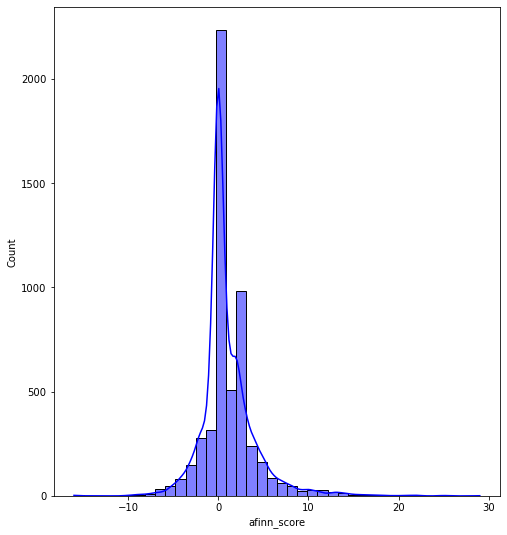

In [29]:
visualize(tweet_test, 'afinn_score')

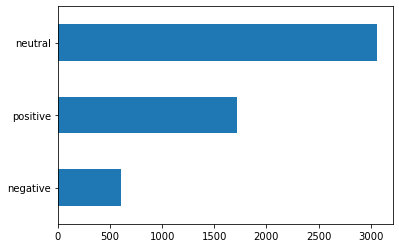

In [30]:
tweet_test['afinn_sentiment'].value_counts().sort_values().plot(kind = 'barh')
plt.show()

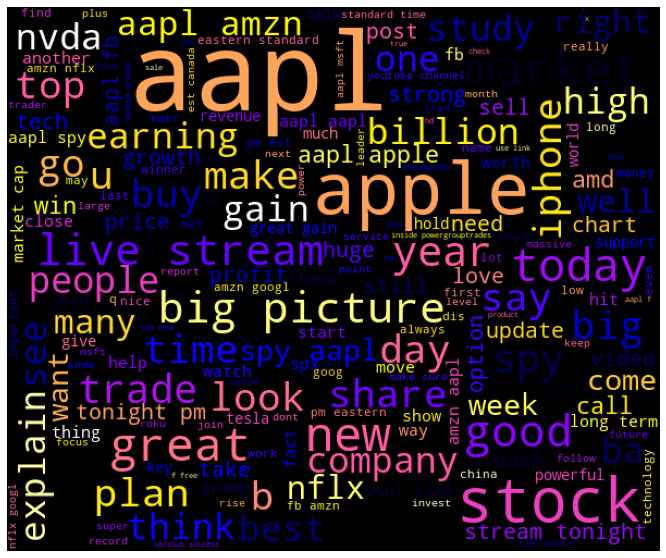

In [31]:
# word cloud for afinn positive words
words_afinn = ' '.join([word for word in tweet_test['body'][tweet_test.afinn_sentiment == 'positive']])
cloudwords(words_afinn)

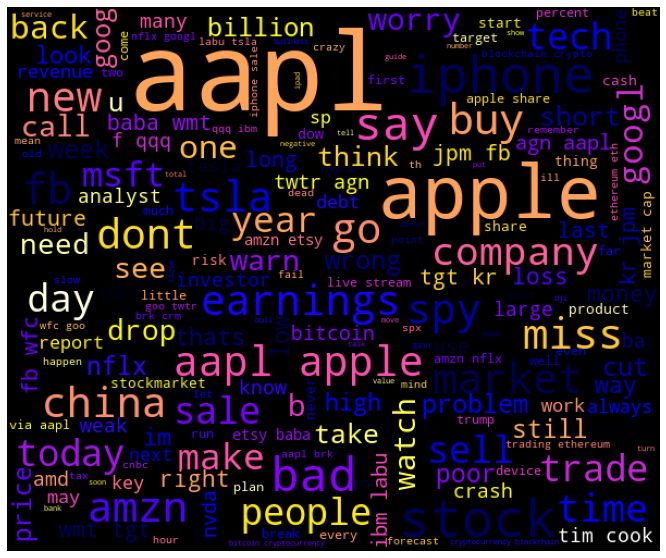

In [32]:
# word cloud for afinn negative words
words_afinn = ' '.join([word for word in tweet_test['body'][tweet_test.afinn_sentiment == 'negative']])
cloudwords(words_afinn)

In [33]:
!pip install vaderSentiment

In [34]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def getVaderScore(tweet):
    sa = analyzer.polarity_scores(tweet)
    vader_score = sa['compound']
    return vader_score

def getVaderSentiment(score):
    if (score >= 0.25):
        return 'positive'
    elif (score < 0.25 and score > -0.25):
        return 'neutral'
    elif (score <= -0.25):
        return 'negative'

In [35]:
tweet_test['vader_score'] = tweet_test['body'].apply(lambda tweet: getVaderScore(tweet))
tweet_test['vader_sentiment'] = tweet_test['vader_score'].apply(lambda score: getVaderSentiment(score))
tweet_test.head()

,tweet_id,writer,body,day_date,ticker_symbol,popularity,afinn_score,afinn_sentiment,vader_score,vader_sentiment
187,550781053137616896,CNBC,wall street top pick hint aapl googl,2015-01-01,AAPL,64,2.0,positive,0.2023,neutral
214,550779709840445441,WSJ,see tech company like apple twitter facebook rank term diversity aapl fb,2015-01-01,AAPL,347,2.0,positive,0.3612,positive
558,550650235404701697,greatspoke,analyst report top stock market option read aapl amzn baba ebay,2015-01-01,AAPL,433,2.0,positive,0.2023,neutral
563,550650451948212224,greatspoke,top stock analyst release report top stock ecig aapl baba ebay ctix,2015-01-01,AAPL,433,4.0,positive,0.3818,positive
1507,550992328035696640,greatspoke,top stock analyst release report top stock ecig aapl baba ebay ctix,2015-01-02,AAPL,350,4.0,positive,0.3818,positive


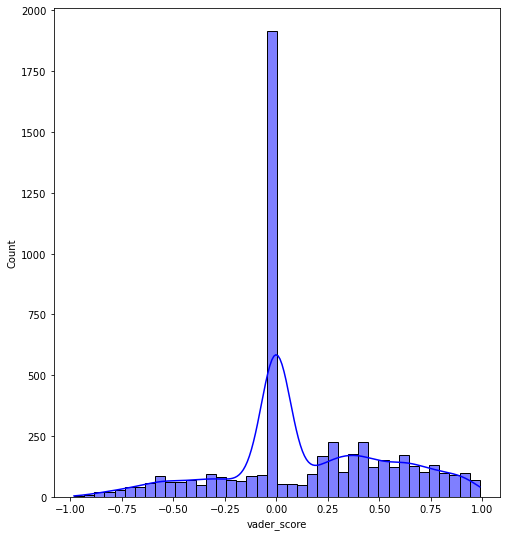

In [36]:
visualize(tweet_test, 'vader_score')

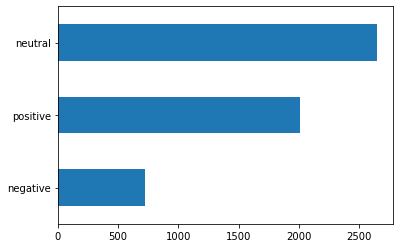

In [37]:
tweet_test['vader_sentiment'].value_counts().sort_values().plot(kind = 'barh')
plt.show()

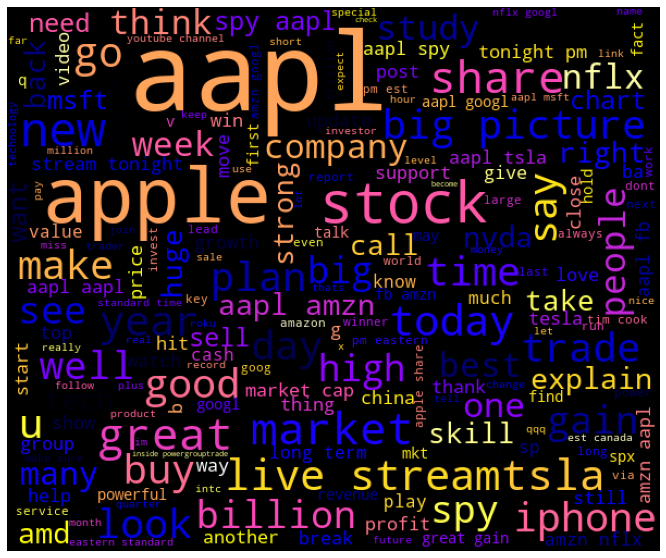

In [38]:
# word cloud for vader positive words
words_vader = ' '.join([word for word in tweet_test['body'][tweet_test.vader_sentiment == 'positive']])
cloudwords(words_vader)

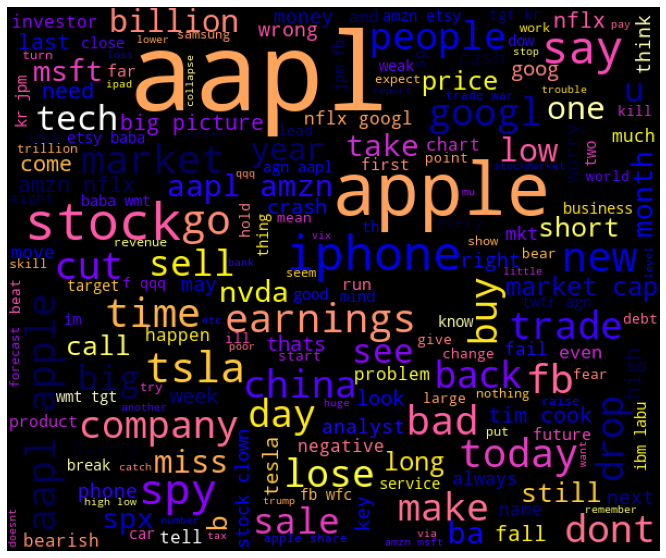

In [39]:
# word cloud for vader negative words
words_vader = ' '.join([word for word in tweet_test['body'][tweet_test.vader_sentiment == 'negative']])
cloudwords(words_vader)

In [40]:
# plot sentiment with stock price gain
from scipy.stats import spearmanr

def draw_sentiment_stock(tweet_cy, stock_cy, column, column1):
    fig = plt.figure(figsize = (30, 10))
    ax1 = fig.add_subplot()
    ax2 = ax1.twinx()
    
    date = pd.to_datetime(stock_cy['day_date']).dt.date
    score_mean = tweet_cy.groupby('day_date')[column].mean().dropna()
    score_mean = score_mean.reindex(date, fill_value = 0)
    corr, pvalue = spearmanr(score_mean, stock_cy[column1], nan_policy = 'omit')

    colors = ['blue' if score >= 0 else 'green' for score in score_mean.values]
    ax1.vlines(score_mean.index, 0, score_mean, color = colors)
    ax1.axhline(y = 0, color = 'red', linestyle = '-')

    ax2.plot(date, stock_cy[column1], color = 'orange', label = column1)
    ax2.set_title('Spearman correlation: corr={}, p-value={}'.format(corr, pvalue))

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Score', color = 'blue')

    plt.legend(loc = 'best')
    plt.show()

In [41]:
# only cares about the negative and positive tweets
tweet_afinn = tweet_test[(tweet_test['afinn_score'] <= -2.0) | (tweet_test['afinn_score'] >= 2.0)]
tweet_vader = tweet_test[(tweet_test['vader_score'] <= -0.25) | (tweet_test['vader_score'] >= 0.25)]

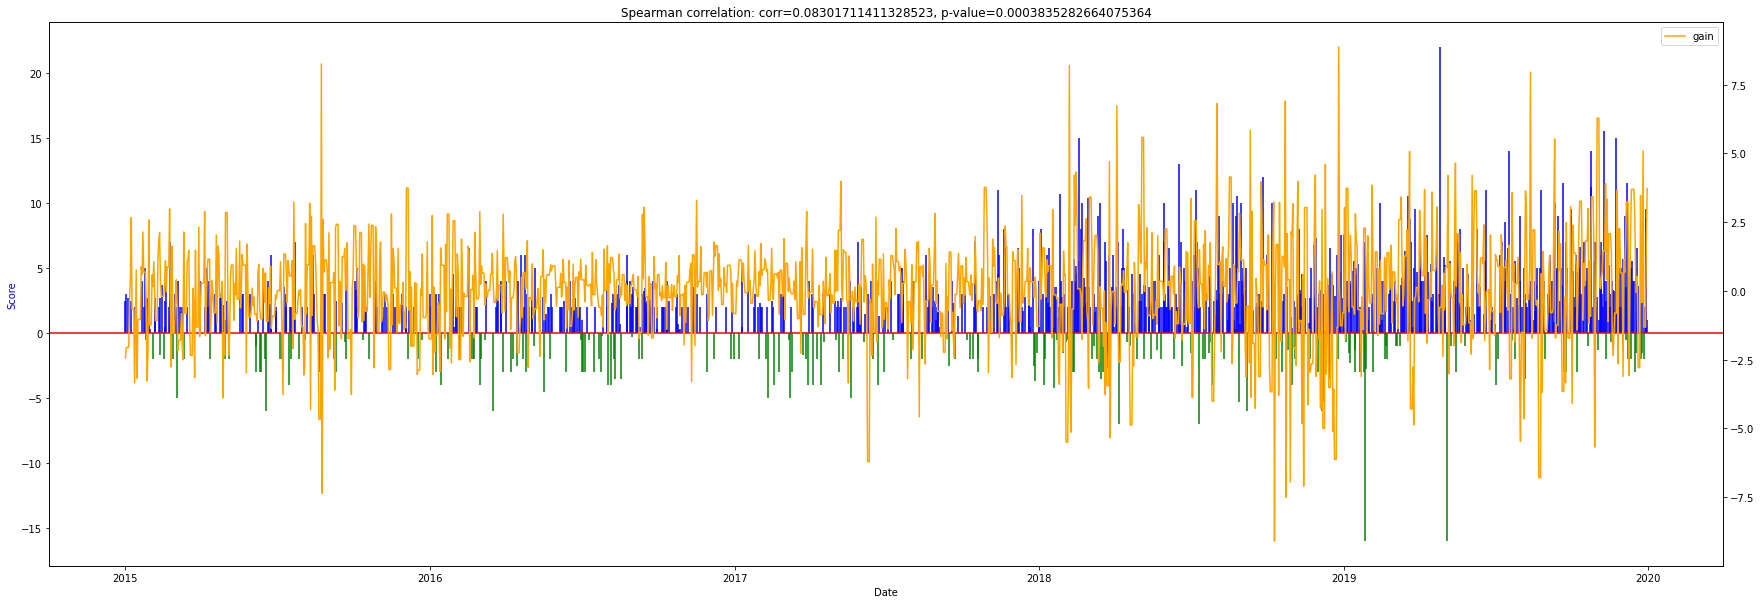

In [42]:
# sentiment with stock price gain
draw_sentiment_stock(tweet_afinn, stock_cy, column = 'afinn_score', column1= 'gain')

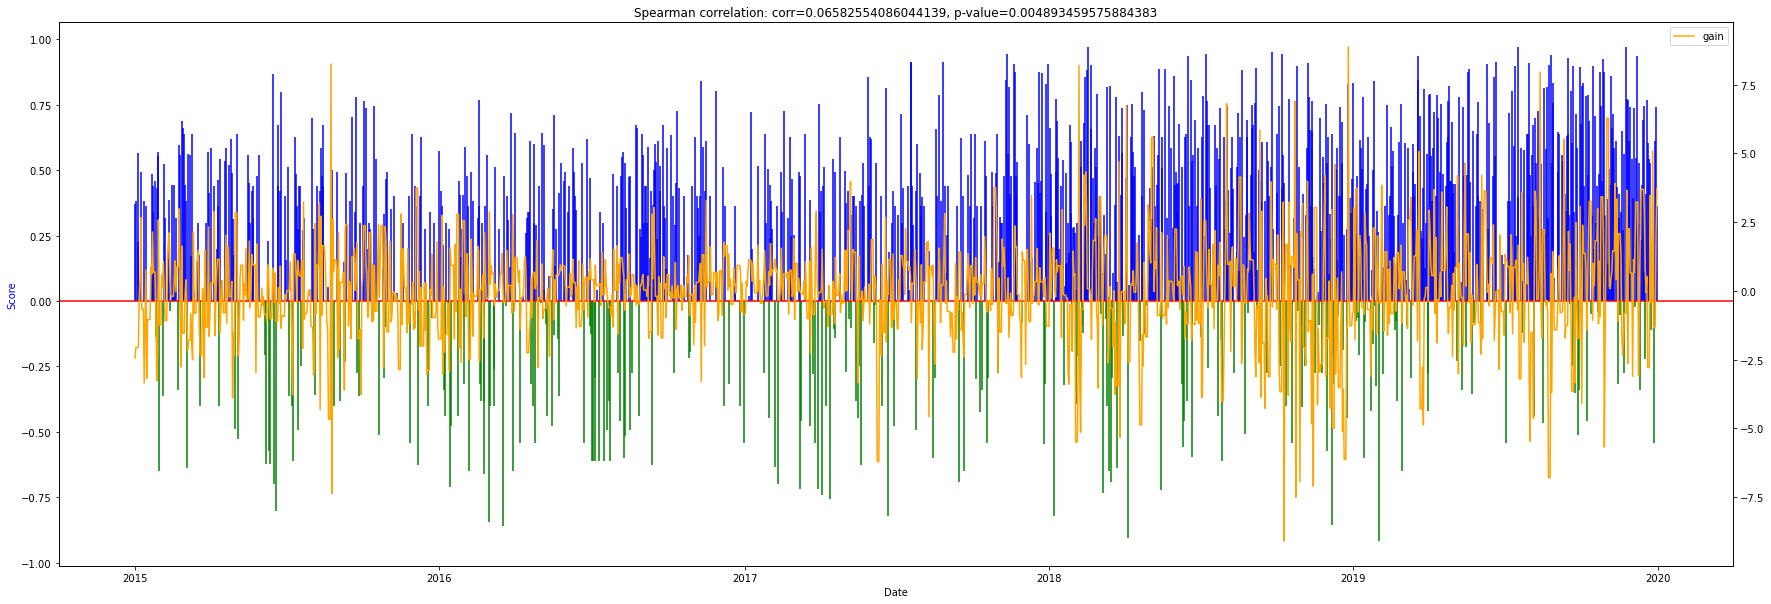

In [43]:
draw_sentiment_stock(tweet_vader, stock_cy, column = 'vader_score', column1 = 'gain')

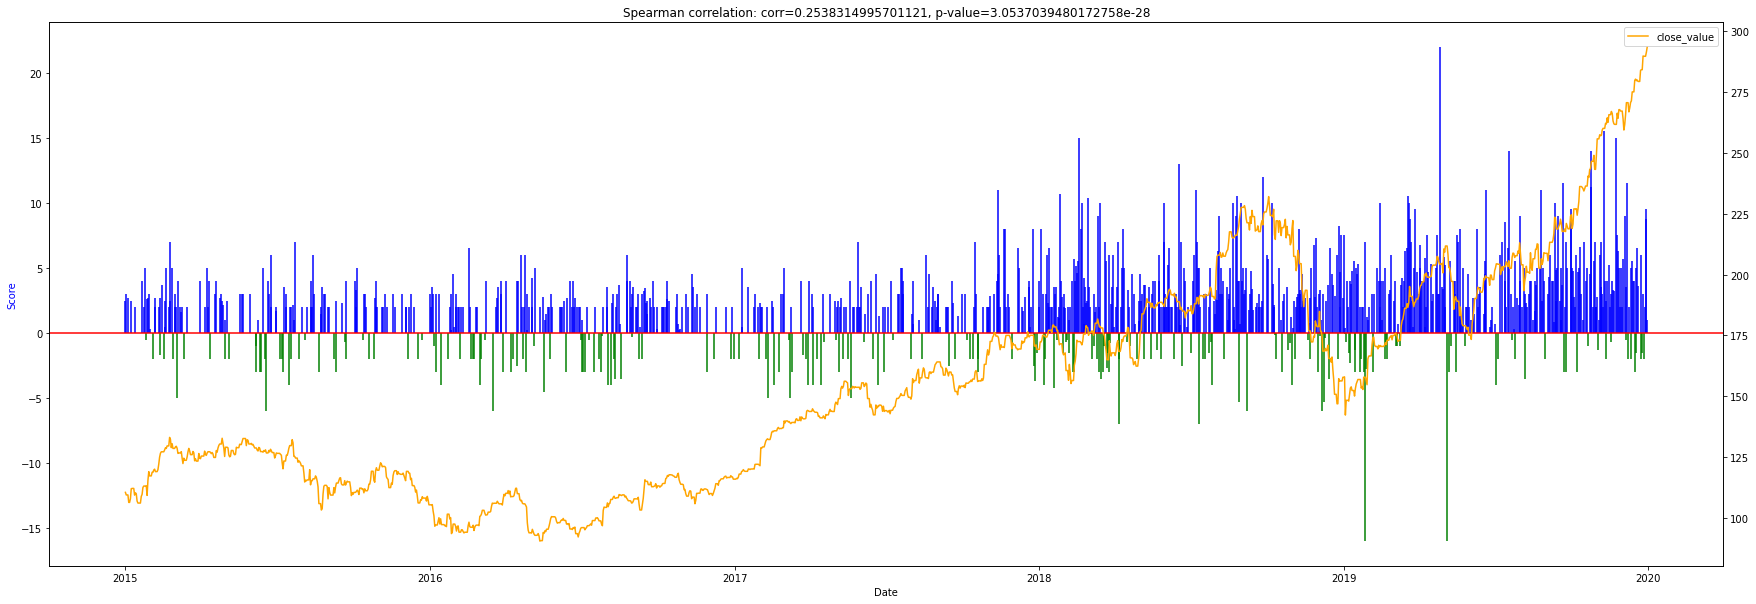

In [44]:
draw_sentiment_stock(tweet_afinn, stock_cy, column = 'afinn_score', column1= 'close_value')

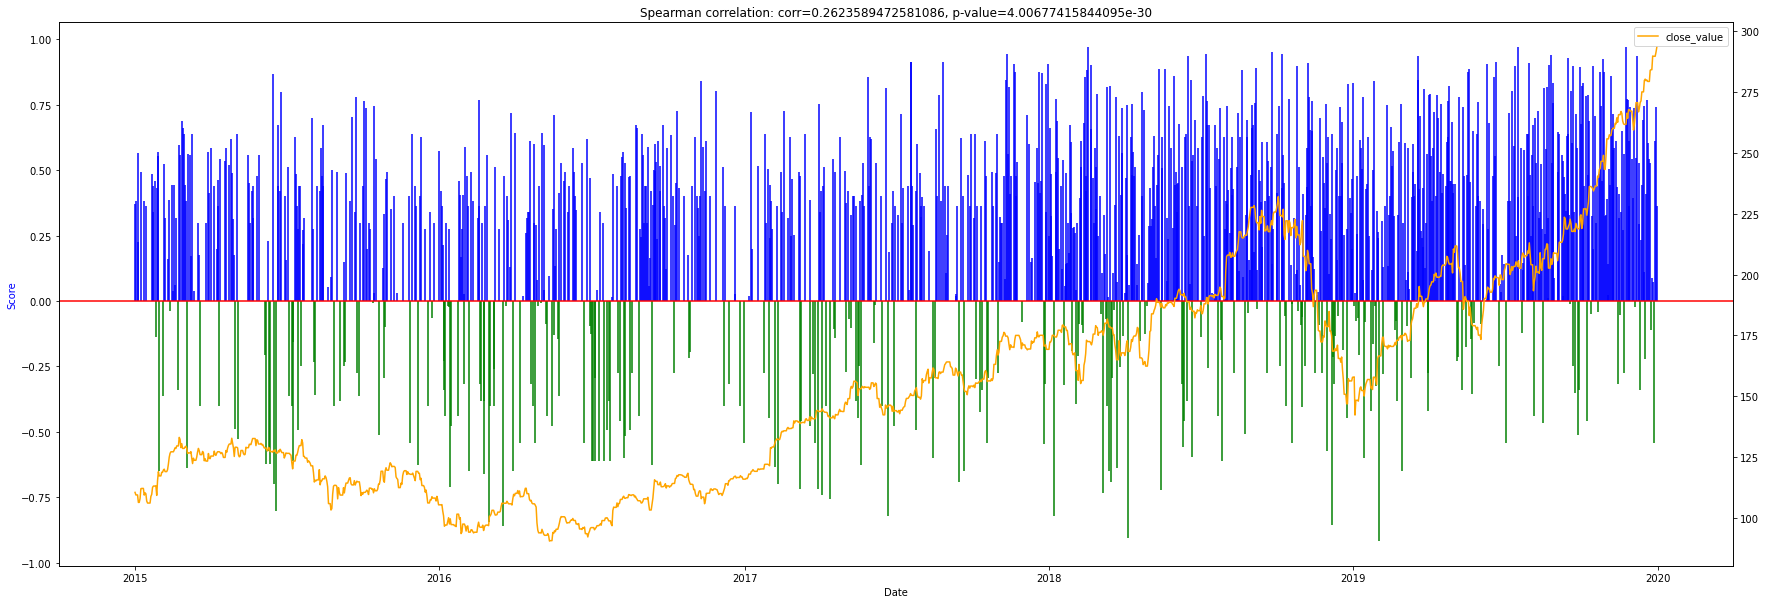

In [45]:
draw_sentiment_stock(tweet_vader, stock_cy, column = 'vader_score', column1 = 'close_value')

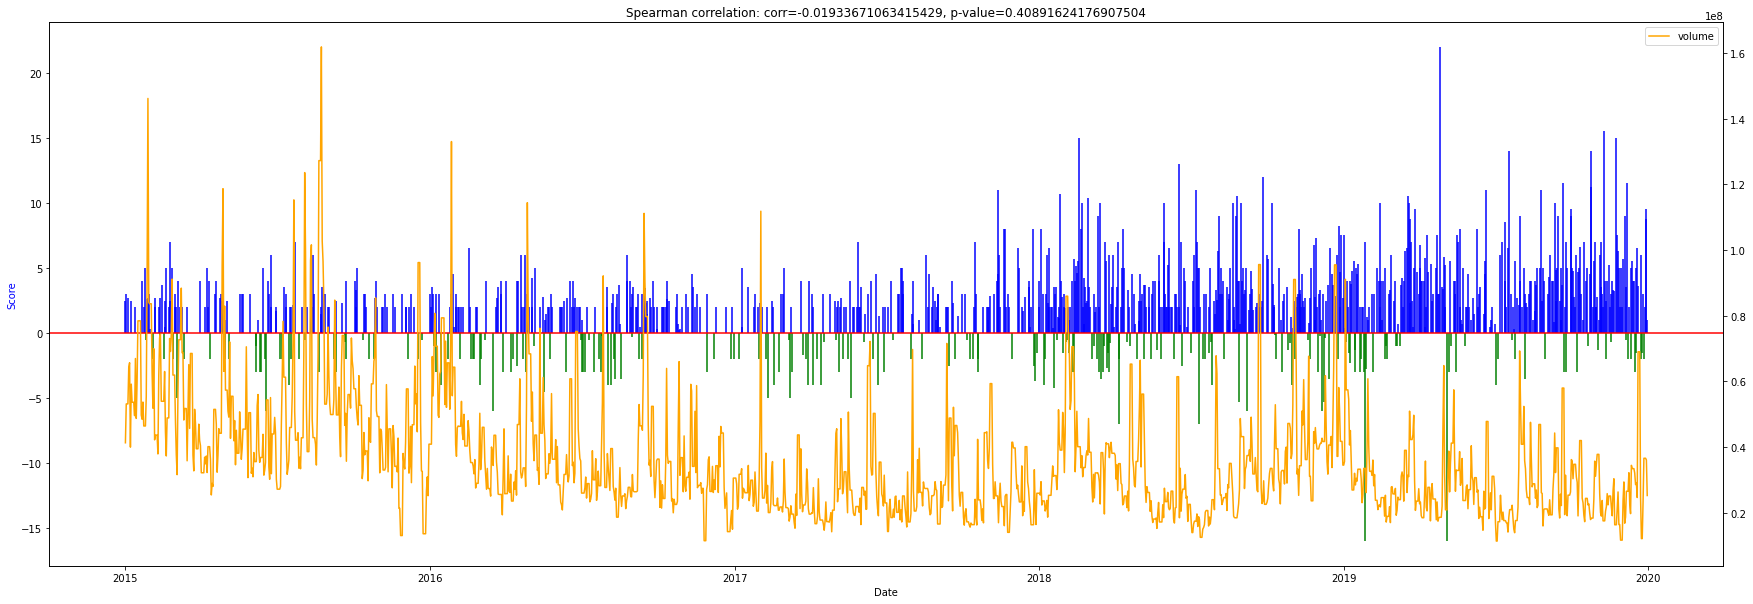

In [46]:
draw_sentiment_stock(tweet_afinn, stock_cy, column = 'afinn_score', column1= 'volume')

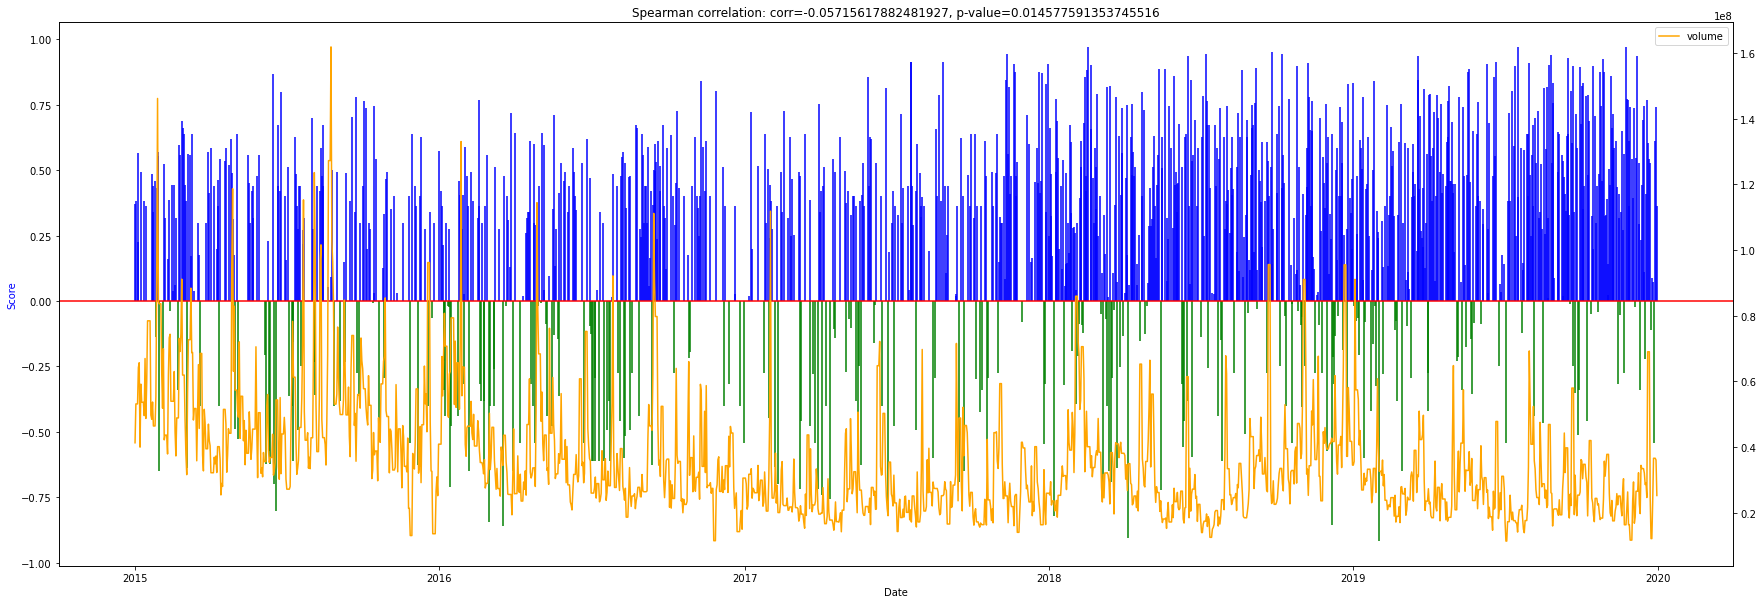

In [47]:
draw_sentiment_stock(tweet_vader, stock_cy, column = 'vader_score', column1 = 'volume')

In [48]:
# vader and afinn label
data = tweet_test.copy()
sentiment_map = {'negative': -1, 'positive': 1, 'neutral': 0}
data['label_vader'] = data['vader_sentiment'].map(sentiment_map)
data['label_afinn'] = data['afinn_sentiment'].map(sentiment_map)
data = data.drop(['ticker_symbol', 'tweet_id', 'writer'], axis = 1)
data.head()

,body,day_date,popularity,afinn_score,afinn_sentiment,vader_score,vader_sentiment,label_vader,label_afinn
187,wall street top pick hint aapl googl,2015-01-01,64,2.0,positive,0.2023,neutral,0,1
214,see tech company like apple twitter facebook rank term diversity aapl fb,2015-01-01,347,2.0,positive,0.3612,positive,1,1
558,analyst report top stock market option read aapl amzn baba ebay,2015-01-01,433,2.0,positive,0.2023,neutral,0,1
563,top stock analyst release report top stock ecig aapl baba ebay ctix,2015-01-01,433,4.0,positive,0.3818,positive,1,1
1507,top stock analyst release report top stock ecig aapl baba ebay ctix,2015-01-02,350,4.0,positive,0.3818,positive,1,1


In [49]:
# idf matrix
X = data['body']
vc = TfidfVectorizer(ngram_range = (1, 2), max_features = 5000)
X = vc.fit_transform(X).toarray()
idf_matrix = pd.DataFrame(X, columns = vc.get_feature_names())
idf_matrix

,aa,aapl,aapl aapl,aapl ada,aapl adbe,aapl almost,aapl also,aapl amazon,aapl amd,aapl amzn,...,zigguratico blockchain,zigguratico ziggurat,ziggurattoken,ziggurattoken etherdelta,zkin,zkin riot,zm,zone,zone match,zuckerberg
0,0.0,0.065677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.049360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.043559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.172529,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.041925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.041925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5379,0.0,0.075415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5380,0.0,0.120512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5381,0.0,0.048054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5382,0.0,0.046061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# with vader label
# naive bayes classifier
y = data['label_vader']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model = BernoulliNB()
model.fit(X_train, y_train)
# evaluation metrics
y_pred = model.predict(X_test)
cr1 = classification_report(y_pred, y_test)
cr1_dict = classification_report(y_pred, y_test, output_dict = True)
print(cr1)

              precision    recall  f1-score   support

          -1       0.31      0.53      0.39        79
           0       0.88      0.68      0.76       701
           1       0.58      0.78      0.67       297

    accuracy                           0.70      1077
   macro avg       0.59      0.66      0.61      1077
weighted avg       0.75      0.70      0.71      1077



In [51]:
# svm
modelSvm = LinearSVC()
modelSvm.fit(X_train, y_train)
y_pred1 = modelSvm.predict(X_test)
cr2 = classification_report(y_pred1, y_test)
cr2_dict = classification_report(y_pred1, y_test, output_dict = True)
print(cr2)

              precision    recall  f1-score   support

          -1       0.43      0.65      0.52        89
           0       0.84      0.73      0.78       623
           1       0.73      0.81      0.77       365

    accuracy                           0.75      1077
   macro avg       0.67      0.73      0.69      1077
weighted avg       0.77      0.75      0.75      1077



In [52]:
# with afinn label
# naive bayes classifier
y1 = data['label_afinn']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size = 0.2, random_state = 42)
model1 = BernoulliNB()
model1.fit(X_train1, y_train1)
y_pred2 = model1.predict(X_test1)
cr3 = classification_report(y_pred2, y_test1)
cr3_dict = classification_report(y_pred2, y_test1, output_dict = True)
print(cr3)

              precision    recall  f1-score   support

          -1       0.24      0.45      0.31        65
           0       0.86      0.68      0.76       769
           1       0.48      0.69      0.57       243

    accuracy                           0.67      1077
   macro avg       0.53      0.61      0.55      1077
weighted avg       0.74      0.67      0.69      1077



In [53]:
# svm
modelSvm1 = LinearSVC()
modelSvm1.fit(X_train1, y_train1)
y_pred3 = modelSvm1.predict(X_test1)
cr4 = classification_report(y_pred3, y_test1)
cr4_dict = classification_report(y_pred3, y_test1, output_dict = True)
print(cr4)

              precision    recall  f1-score   support

          -1       0.37      0.79      0.50        57
           0       0.90      0.76      0.82       725
           1       0.69      0.81      0.75       295

    accuracy                           0.77      1077
   macro avg       0.65      0.79      0.69      1077
weighted avg       0.82      0.77      0.79      1077



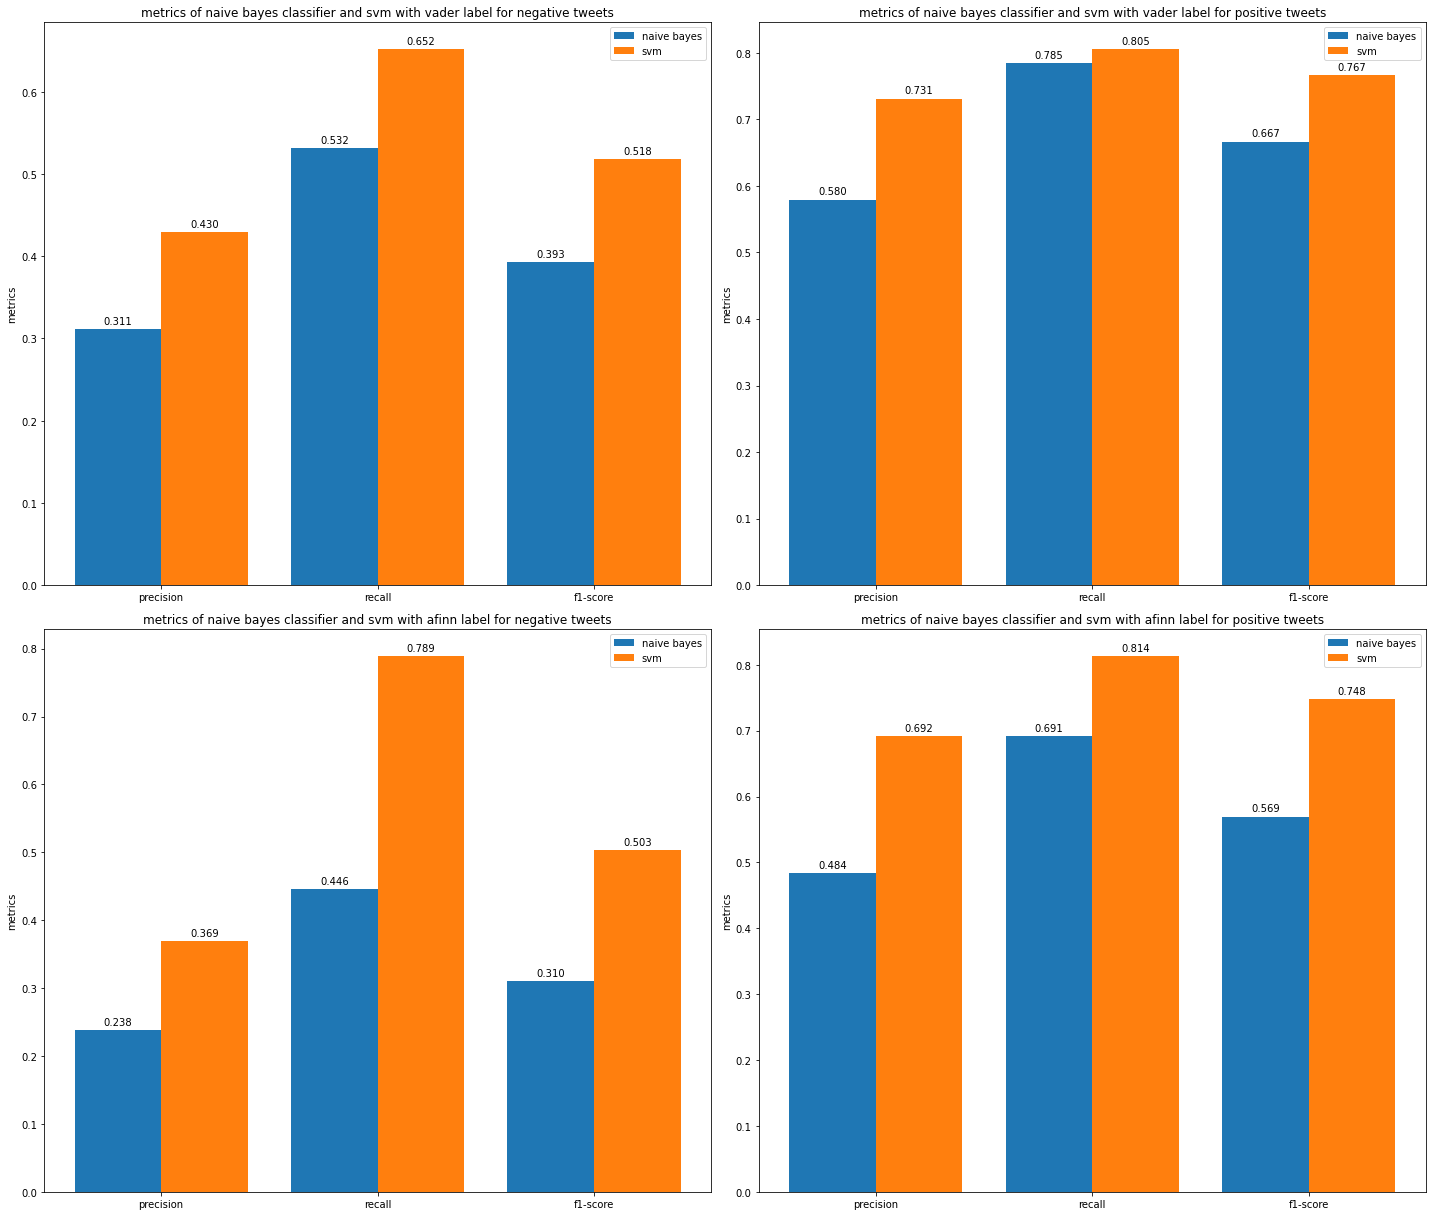

In [54]:
# plot metrics
negative_naive = []
positive_naive = []
negative_svm = []
positive_svm = []

negative_naive_afinn = []
positive_naive_afinn = []
negative_svm_afinn = []
positive_svm_afinn = []
metrics = ['precision', 'recall', 'f1-score']
for i in metrics:
  negative_naive.append(cr1_dict['-1'][i])
  positive_naive.append(cr1_dict['1'][i])
  negative_svm.append(cr2_dict['-1'][i])
  positive_svm.append(cr2_dict['1'][i])

  negative_naive_afinn.append(cr3_dict['-1'][i])
  positive_naive_afinn.append(cr3_dict['1'][i])
  negative_svm_afinn.append(cr4_dict['-1'][i])
  positive_svm_afinn.append(cr4_dict['1'][i])

x_axis = np.arange(len(metrics))
width = 0.4
fig, ax = plt.subplots(2, 2, figsize = (20, 17))
ax1, ax2, ax3, ax4 = ax.flatten()
bar1 = ax1.bar(x_axis - width/2, negative_naive, width, label = 'naive bayes')
bar2 = ax1.bar(x_axis + width/2, negative_svm, width, label = 'svm')
ax1.set_ylabel('metrics')
ax1.set_title('metrics of naive bayes classifier and svm with vader label for negative tweets')
ax1.set_xticks(x_axis, metrics)
ax1.legend()
ax1.bar_label(bar1, padding=3, fmt = '%.3f')
ax1.bar_label(bar2, padding=3, fmt = '%.3f')

bar3 = ax2.bar(x_axis - width/2, positive_naive, width, label = 'naive bayes')
bar4 = ax2.bar(x_axis + width/2, positive_svm, width, label = 'svm')
ax2.set_ylabel('metrics')
ax2.set_title('metrics of naive bayes classifier and svm with vader label for positive tweets')
ax2.set_xticks(x_axis, metrics)
ax2.legend()
ax2.bar_label(bar3, padding=3, fmt = '%.3f')
ax2.bar_label(bar4, padding=3, fmt = '%.3f')

bar5 = ax3.bar(x_axis - width/2, negative_naive_afinn, width, label = 'naive bayes')
bar6 = ax3.bar(x_axis + width/2, negative_svm_afinn, width, label = 'svm')
ax3.set_ylabel('metrics')
ax3.set_title('metrics of naive bayes classifier and svm with afinn label for negative tweets')
ax3.set_xticks(x_axis, metrics)
ax3.legend()
ax3.bar_label(bar5, padding=3, fmt = '%.3f')
ax3.bar_label(bar6, padding=3, fmt = '%.3f')

bar7 = ax4.bar(x_axis - width/2, positive_naive_afinn, width, label = 'naive bayes')
bar8 = ax4.bar(x_axis + width/2, positive_svm_afinn, width, label = 'svm')
ax4.set_ylabel('metrics')
ax4.set_title('metrics of naive bayes classifier and svm with afinn label for positive tweets')
ax4.set_xticks(x_axis, metrics)
ax4.legend()
ax4.bar_label(bar7, padding=3, fmt = '%.3f')
ax4.bar_label(bar8, padding=3, fmt = '%.3f')

fig.tight_layout()
plt.show()

Visualization

In [55]:
body_df = tweet_cy.copy()
body_df

,tweet_id,writer,body,comment_num,retweet_num,like_num,day_date,ticker_symbol
0,550441509175443456,VisualStockRSRC,"lx21 made $10,008 on $AAPL -Check it out! http://profit.ly/1MnD8s?aff=202 Learn #howtotrade http://bit.ly/1c1NljX $EXE $WATT $IMRS $CACH $GMO",0,0,1,2015-01-01,AAPL
6,550713014346059776,SentiQuant,#SENTISHIFTUP $K $AAPL $GS $FB $T $TWTR $BABA $LNKD $AMZN $QUAD #sentiquant 20150101 13:00:04:301,0,0,0,2015-01-01,AAPL
16,550716105573269506,OphirGottlieb,$AAPL Risk into Earnings Rising Early (pic)data via -> http://bit.ly/lvo_volscan-Option Trading is Volatility Trading,0,1,3,2015-01-01,AAPL
17,550713015797284864,SentiQuant,#TOPTICKERTWEETS $AAPL $BABA $EBAY $IMRS $AMZN $T $SPY $IGN $K $FB #sentiquant 20150101 13:00:07:815,0,0,1,2015-01-01,AAPL
20,550709021653876736,helpYOUgetGAINS,Apple’s Guided Tour to Using the First Macintosh (1984) | Open Culture $AAPL,0,0,0,2015-01-01,AAPL
...,...,...,...,...,...,...,...,...
4336430,1212010169485291526,VolumeDynamics,More shares of $AAPL traded premarket here than either $QQQ or $SPY - just throwing money at the pigs... what a joke.,0,0,3,2019-12-31,AAPL
4336434,1212009773304029190,StckPro,$AAPL $SNE NEW ARTICLE : Apple's iPhone Will Dominate Smartphones in 2020. Here's Why https://dashboard.stck.pro/news.php?ticker=AAPL&rowid=3123623… Get all the latest $AAPL related news here : https://dashboard.stck.pro/news.php?ticker=AAPL…,0,0,0,2019-12-31,AAPL
4336437,1212009240828796929,MWM76,"If We pullback, AAPL is a Screaming short imo!https://stockscores.com/chart.asp?TickerSymbol=AAPL&TimeRa… $AAPL",0,0,0,2019-12-31,AAPL
4336438,1212009227939536896,Ihubpennys,$ARYC on standby for Financials @Arrayit is a #SiliconValley #biotech stock at 2 pennies per share and on a 2 year steady uptrend #pennystocks $bioaq $andi $fusz $drus $icbu $rbiz $amfe $alkm $aapl $fb $wmih $dman $sbes $intv $fnma $tron $laho $amrn $avxl $abce $govx $dcgd,1,5,10,2019-12-31,AAPL


In [56]:
date_df =body_df['day_date']
date_df =date_df.reset_index() 
date_df = date_df['day_date']
date_df

0         2015-01-01
1         2015-01-01
2         2015-01-01
3         2015-01-01
4         2015-01-01
             ...    
1425008   2019-12-31
1425009   2019-12-31
1425010   2019-12-31
1425011   2019-12-31
1425012   2019-12-31
Name: day_date, Length: 1425013, dtype: datetime64[ns]

In [57]:
body_df2 =body_df['body']
body_df2=body_df2.reset_index() 
body_df2=body_df2['body']
body_df2

0                                                                                                                                             lx21 made $10,008  on $AAPL -Check it out! http://profit.ly/1MnD8s?aff=202 Learn #howtotrade http://bit.ly/1c1NljX $EXE $WATT $IMRS $CACH $GMO
1                                                                                                                                                                                          #SENTISHIFTUP $K $AAPL $GS $FB $T $TWTR $BABA $LNKD $AMZN $QUAD #sentiquant 20150101 13:00:04:301
2                                                                                                                                                                      $AAPL Risk into Earnings Rising Early (pic)data via -> http://bit.ly/lvo_volscan-Option Trading is Volatility Trading
3                                                                                                                                                

In [58]:
tweet_df = pd.concat([body_df2, date_df], axis= 1)
tweet_df

,body,day_date
0,"lx21 made $10,008 on $AAPL -Check it out! http://profit.ly/1MnD8s?aff=202 Learn #howtotrade http://bit.ly/1c1NljX $EXE $WATT $IMRS $CACH $GMO",2015-01-01
1,#SENTISHIFTUP $K $AAPL $GS $FB $T $TWTR $BABA $LNKD $AMZN $QUAD #sentiquant 20150101 13:00:04:301,2015-01-01
2,$AAPL Risk into Earnings Rising Early (pic)data via -> http://bit.ly/lvo_volscan-Option Trading is Volatility Trading,2015-01-01
3,#TOPTICKERTWEETS $AAPL $BABA $EBAY $IMRS $AMZN $T $SPY $IGN $K $FB #sentiquant 20150101 13:00:07:815,2015-01-01
4,Apple’s Guided Tour to Using the First Macintosh (1984) | Open Culture $AAPL,2015-01-01
...,...,...
1425008,More shares of $AAPL traded premarket here than either $QQQ or $SPY - just throwing money at the pigs... what a joke.,2019-12-31
1425009,$AAPL $SNE NEW ARTICLE : Apple's iPhone Will Dominate Smartphones in 2020. Here's Why https://dashboard.stck.pro/news.php?ticker=AAPL&rowid=3123623… Get all the latest $AAPL related news here : https://dashboard.stck.pro/news.php?ticker=AAPL…,2019-12-31
1425010,"If We pullback, AAPL is a Screaming short imo!https://stockscores.com/chart.asp?TickerSymbol=AAPL&TimeRa… $AAPL",2019-12-31
1425011,$ARYC on standby for Financials @Arrayit is a #SiliconValley #biotech stock at 2 pennies per share and on a 2 year steady uptrend #pennystocks $bioaq $andi $fusz $drus $icbu $rbiz $amfe $alkm $aapl $fb $wmih $dman $sbes $intv $fnma $tron $laho $amrn $avxl $abce $govx $dcgd,2019-12-31


In [59]:
count_df  = tweet_df.groupby('day_date').count()
count_df = count_df.reset_index(level='day_date')
count_df ['day_date']= pd.to_datetime(count_df['day_date'])
count_df

,day_date,body
0,2015-01-01,299
1,2015-01-02,867
2,2015-01-03,346
3,2015-01-04,406
4,2015-01-05,1147
...,...,...
1814,2019-12-27,381
1815,2019-12-28,210
1816,2019-12-29,190
1817,2019-12-30,732


In [60]:
count_df['month'] = count_df['day_date'].dt.month
count_df['year'] = count_df['day_date'].dt.year
count_df
year_tweet=count_df.groupby('year')['body'].sum()
year_tweet = year_tweet.to_frame()
year_tweet=year_tweet.reset_index()
year_tweet

,year,body
0,2015,360177
1,2016,405645
2,2017,219043
3,2018,223136
4,2019,217012


In [61]:
#sentiment seasonal visualization,copy a new dataset, divide month and year
season_tweet=tweet_test.copy()
season_tweet['month'] = season_tweet['day_date'].dt.month
season_tweet['year'] = season_tweet['day_date'].dt.year
season_tweet1= season_tweet[season_tweet['year']==2019]
season_tweet1

,tweet_id,writer,body,day_date,ticker_symbol,popularity,afinn_score,afinn_sentiment,vader_score,vader_sentiment,month,year
3431448,1080223070982496258,ACXtrades,new way living buy thing want basically free earn money stock buy product withso egto buy new macbook trade aapl make couple grand buy winningssavingssss,2019-01-01,AAPL,138,5.0,positive,0.7650,positive,1,2019
3431939,1079914043245252609,Sandro_power,happy new year people may spy qqq iwm aapl amzn ba amd g twtr tsla key stock well u leadership adapt health wealth key without health nothing keep mind make good year,2019-01-01,AAPL,150,10.0,positive,0.8979,positive,1,2019
3432128,1080029412660310022,CryptoMichNL,december performerscryptobtc eth ltc xrp strat stock indexesdji ndx dax nky major stocksaapl amzn msft othersgold silver crypto outperform stock last month,2019-01-01,AAPL,153,0.0,neutral,0.0000,neutral,1,2019
3432216,1080587194627227648,The_Real_Fly,aapl decline yoy number b debt thanks idiotic share buyback,2019-01-02,AAPL,74,-2.0,negative,-0.1779,neutral,1,2019
3432218,1080587143976837126,CNBC,apple drop warn q result iphones apple watch sale disappoint aapl,2019-01-02,AAPL,116,-5.0,negative,-0.6369,negative,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
4335488,1211813581722750976,GerberKawasaki,could watch steve job day apple genius aapl,2019-12-31,AAPL,227,0.0,neutral,0.0000,neutral,12,2019
4335770,1211833488476966912,VolatilityWiz,x aapl etf yet,2019-12-31,AAPL,190,0.0,neutral,0.0000,neutral,12,2019
4335814,1212023549432606721,SJosephBurns,apple microsoft surge year respectively two big contributor sp gain year msft aapl spy,2019-12-31,AAPL,56,3.0,positive,0.7003,positive,12,2019
4336364,1212017802279829505,Investingcom,topperforming stock dow aapl msft v jpm utx g nke pg dis axp wmt intc hd mrk unh,2019-12-31,AAPL,50,0.0,neutral,0.0000,neutral,12,2019


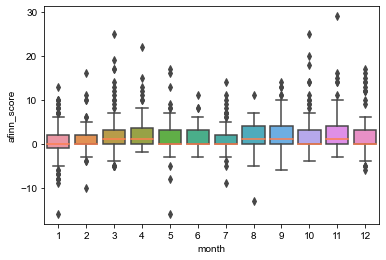

In [62]:

x = season_tweet1['month']
y = season_tweet1['afinn_score']
afinn_data = pd.concat([x, y], axis= 1)
#remove afinn_score equals to 0, if not, the median for all months would be the same
#afinn_data= afinn_data.loc[afinn_data['afinn_score'] != 0]
sns.boxplot(x='month', y='afinn_score', data=afinn_data,medianprops={"color": "coral"})
sns.set(rc={"figure.figsize":(10,7 )}) 

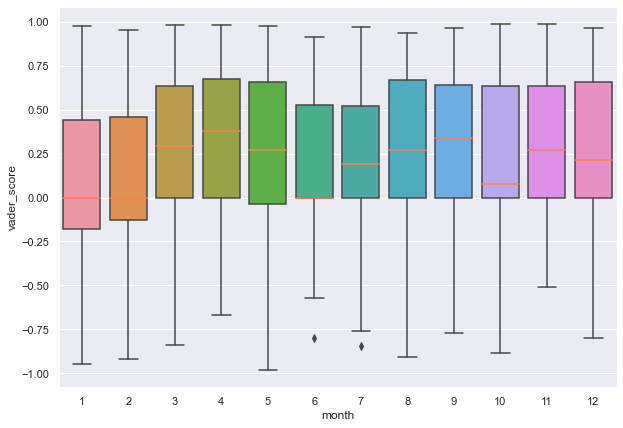

In [63]:
x2 = season_tweet1['month']
y2 = season_tweet1 ['vader_score']
vader_data = pd.concat([x2, y2], axis= 1)
#vader_data= vader_data.loc[vader_data['vader_score'] != 0]
f= sns.boxplot(data=vader_data,x='month', y='vader_score', medianprops={"color": "coral"})
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
sns.set(rc={"figure.figsize":(10,7 )}) 

stacked plot

In [64]:
x3= season_tweet['year']
y3=season_tweet['afinn_sentiment']
data4= pd.concat([x3,y3],axis = 1)
data4 = data4.set_index('year')
data4 = data4.groupby('year').value_counts()
data4 = pd.DataFrame(data4)
data4.columns = ['number']
data4 = data4.reset_index()
#data4 = data4.set_index('year','afinn_sentiment') 
data4

,year,afinn_sentiment,number
0,2015,neutral,485
1,2015,positive,213
2,2015,negative,68
3,2016,neutral,564
4,2016,positive,220
5,2016,negative,80
6,2017,neutral,517
7,2017,positive,179
8,2017,negative,81
9,2018,neutral,824


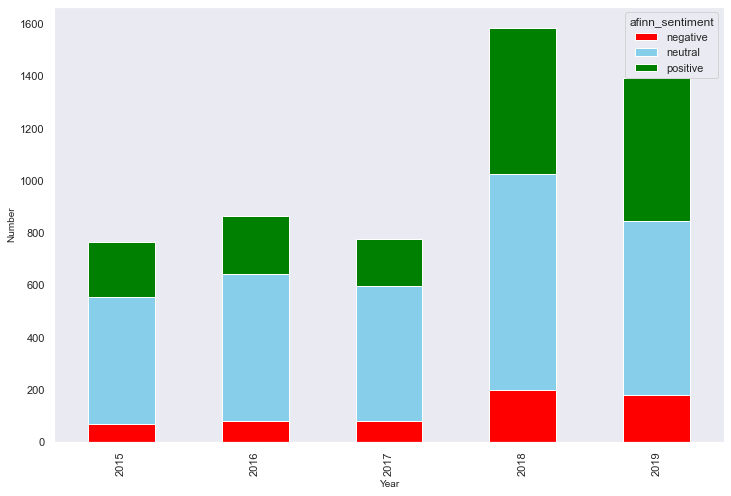

In [65]:
fig, ax=plt.subplots(figsize=(12,8))
df_stack = data4.pivot_table(index="year",
               columns="afinn_sentiment", 
               values="number",
               aggfunc=sum)
df_stack.plot.bar(stacked=True, ax=ax,color=['red', 'skyblue', 'green'])
plt.xlabel("Year", fontsize=10)
plt.ylabel("Number", fontsize=10)
plt.grid(False)

In [66]:
x5= season_tweet['year']
y5=season_tweet['vader_sentiment']
data5= pd.concat([x5,y5],axis = 1)
data5 = data5.set_index('year')
data5 = data5.groupby('year').value_counts()
data5 = pd.DataFrame(data5)
data5.columns = ['number']
data5 = data5.reset_index()
#data4 = data4.set_index('year','afinn_sentiment') 
data5

,year,vader_sentiment,number
0,2015,neutral,436
1,2015,positive,247
2,2015,negative,83
3,2016,neutral,517
4,2016,positive,244
5,2016,negative,103
6,2017,neutral,469
7,2017,positive,225
8,2017,negative,83
9,2018,neutral,692


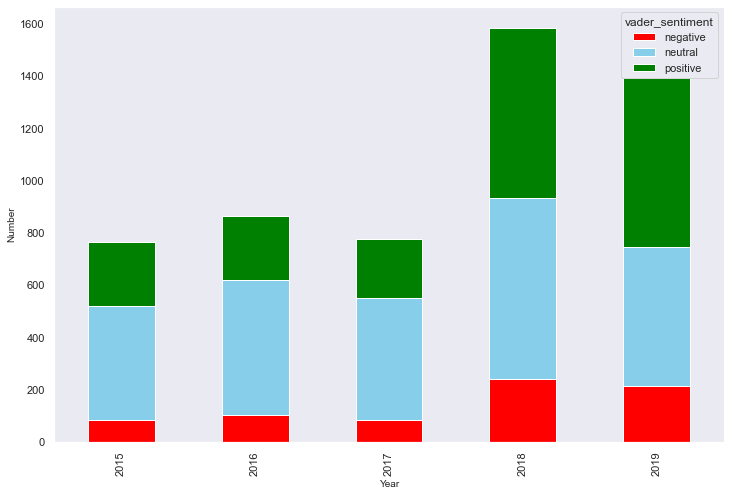

In [67]:
fig, ax=plt.subplots(figsize=(12,8))
df_stack2 = data5.pivot_table(index="year",
               columns="vader_sentiment", 
               values="number",
               aggfunc=sum)
df_stack2.plot.bar(stacked=True, ax=ax,color=['red', 'skyblue', 'green'])
plt.xlabel("Year", fontsize=10)
plt.ylabel("Number", fontsize=10)
plt.grid(False)